<a href="https://colab.research.google.com/github/ayj22/Customer-Analytics-FMCG/blob/master/Customer_Analytics_Segmentation_FMCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

#Importing the dataset

In [2]:
data =  pd.read_csv("segmentation data.csv", index_col = 0)

#Exploring the dataset

In [3]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#Correlation Matrix

In [5]:
#finding the Correlation between variables:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


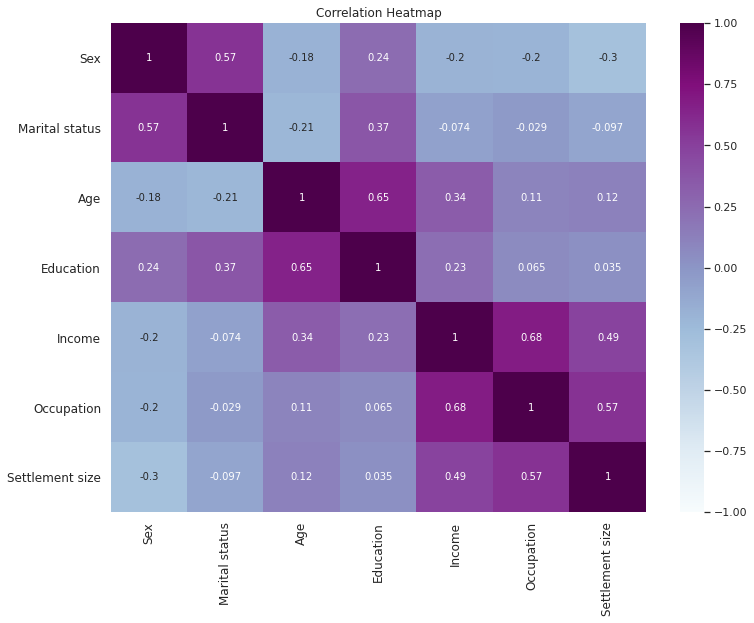

In [6]:
plt.figure(figsize = (12,9))
map = sns.heatmap(data.corr(),
                  annot = True,
                  cmap = 'BuPu',
                  vmin = -1,
                  vmax = 1)

map.set_yticklabels(map.get_yticklabels(), rotation = 0, fontsize = 12)
map.set_xticklabels(map.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Visualization of Age vs Income')

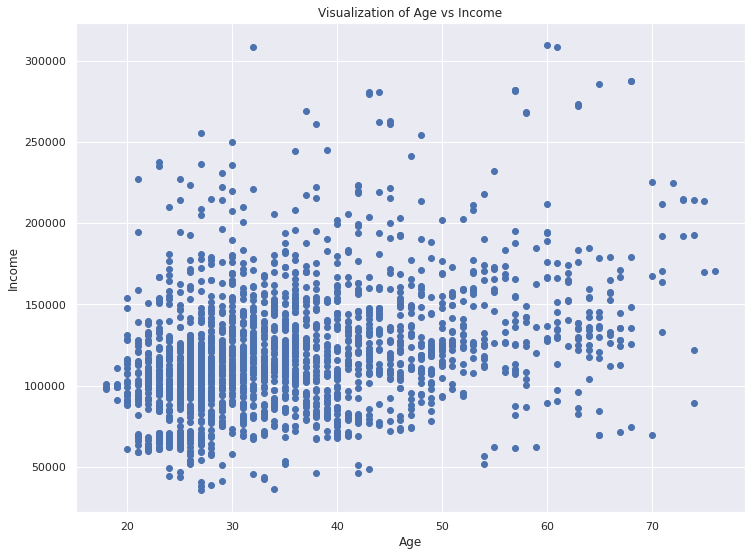

In [7]:
#Visualizing the data
plt.figure(figsize = (12,9))
plt.scatter(data.iloc[:,2], data.iloc[:,4])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Visualization of Age vs Income")

#Standardization

In [8]:
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(data)

#Hierarchical Clustering

In [9]:
#Finding possible clusters using dendrograms
clust_hier = linkage(segmentation_std, method= 'ward')

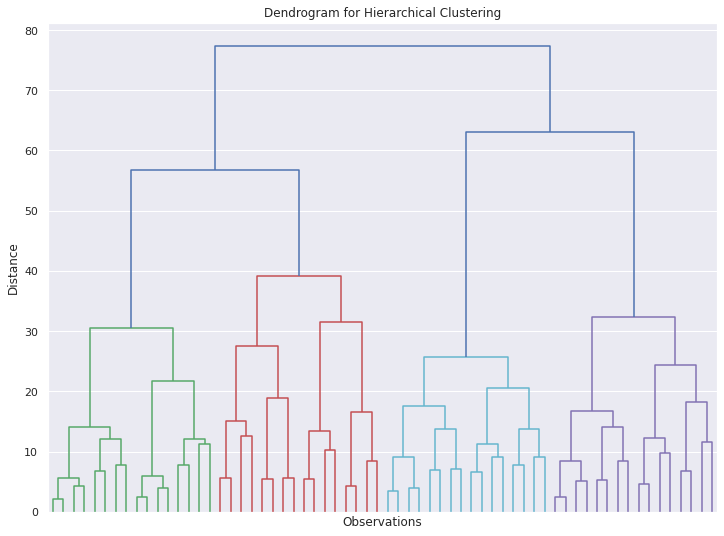

In [10]:
#Plotting the dendrogram diagram
plt.figure(figsize= (12,9))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(clust_hier,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

#K-means Clustering

In [11]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

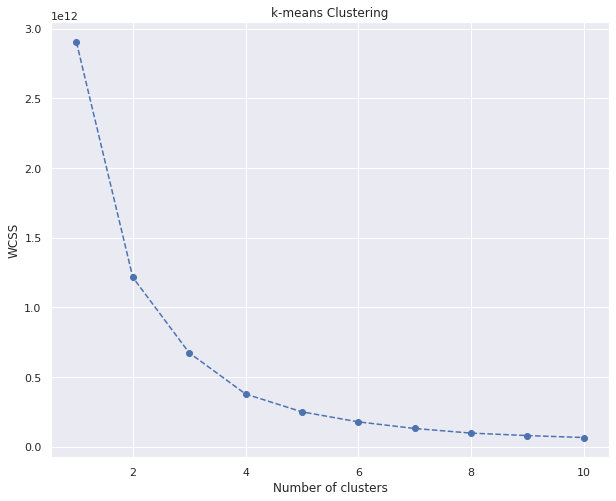

In [12]:
plt.figure(figsize= (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("k-means Clustering")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, init= 'k-means++', random_state= 42)

In [14]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#Outcome after applying K-mean clustering algorithm:

In [15]:
data_kmeans = data.copy()
data_kmeans['Segment K-means'] = kmeans.labels_

In [16]:
data_analysis = data_kmeans.groupby(["Segment K-means"]).mean()
data_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.505241,0.527254,34.432914,1.003145,114888.382600,0.829140,0.714885
1,0.303297,0.435165,40.940659,1.193407,154237.230769,1.248352,1.235165
2,0.543210,0.514403,32.220165,0.895062,79196.028807,0.156379,0.164609
3,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667


In [17]:
data_analysis['N Obs'] = data_kmeans[["Segment K-means", 'Sex']].groupby(['Segment K-means']).count()

In [18]:
data_analysis['Prop Obs'] = data_analysis['N Obs']/ data_analysis['N Obs'].sum()

In [19]:
data_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.505241,0.527254,34.432914,1.003145,114888.382600,0.829140,0.714885,954,0.4770
1,0.303297,0.435165,40.940659,1.193407,154237.230769,1.248352,1.235165,455,0.2275
2,0.543210,0.514403,32.220165,0.895062,79196.028807,0.156379,0.164609,486,0.2430
3,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667,105,0.0525


In [20]:
data_analysis.rename({0: 'Standard',
                      1: 'Fewer Opportunity',
                      2: 'Career Focused',
                      3: 'Well-off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Standard,0.505241,0.527254,34.432914,1.003145,114888.382600,0.829140,0.714885,954,0.4770
Fewer Opportunity,0.303297,0.435165,40.940659,1.193407,154237.230769,1.248352,1.235165,455,0.2275
Career Focused,0.543210,0.514403,32.220165,0.895062,79196.028807,0.156379,0.164609,486,0.2430
Well-off,0.285714,0.400000,44.590476,1.342857,225124.866667,1.771429,1.466667,105,0.0525


In [21]:
data_kmeans['Labels'] = data_kmeans['Segment K-means'].map({0: 'Standard',
                                                            1: 'Fewer Opportunity',
                                                            2: 'Career Focused',
                                                            3: 'Well-off'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


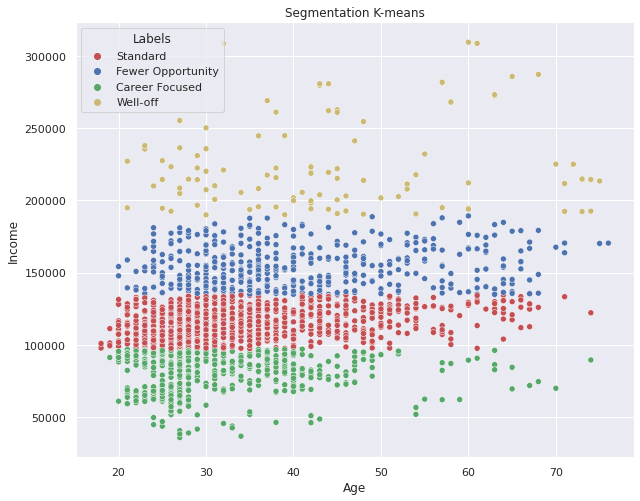

In [22]:
x_axis = data_kmeans['Age']
y_axis = data_kmeans['Income']
plt.figure(figsize= (10,8))
sns.scatterplot(x_axis, y_axis, hue=data_kmeans['Labels'], palette= ['r', 'b', 'g', 'y'])
plt.title("Segmentation K-means")
plt.show()

#Applying PCA for Dimensional Reduction:

In [23]:
pca = PCA()

In [24]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

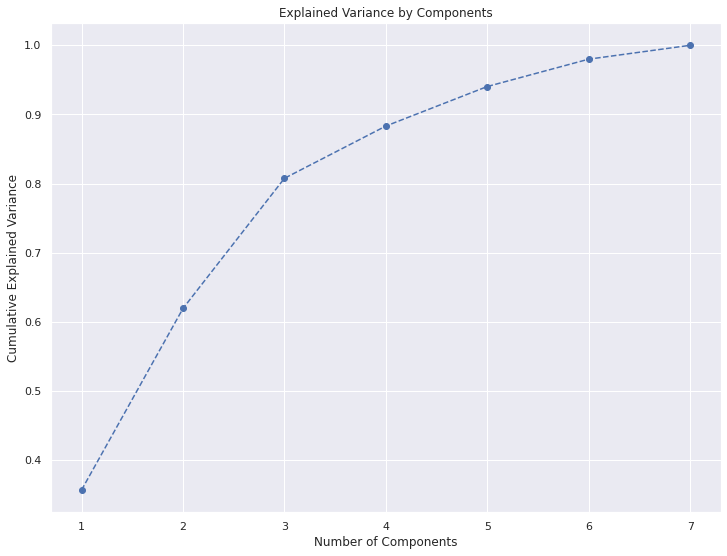

In [26]:
plt.figure(figsize= (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [27]:
pca = PCA(n_components= 3)

In [28]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Solution after 3 as Components

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [30]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


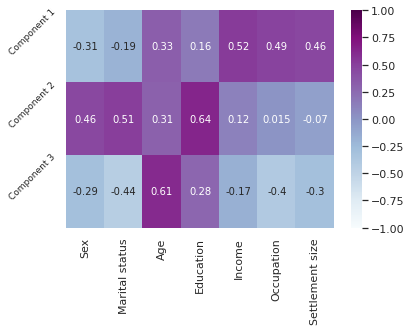

In [31]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'BuPu',
            annot = True);

plt.yticks([0,1,2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9);

In [32]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [33]:
scores_pca = pca.transform(segmentation_std)

#K-means clustering after PCA

In [34]:
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmeans_pca.fit(data)
  wcss.append(kmeans_pca.inertia_)

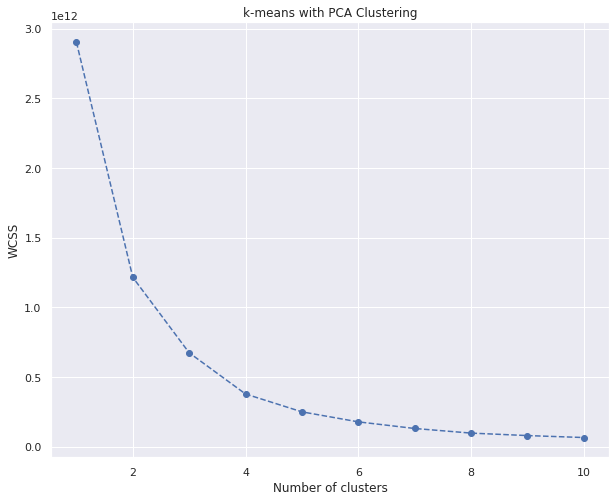

In [35]:
plt.figure(figsize= (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("k-means with PCA Clustering")
plt.show()

In [36]:
kmeans_pca = KMeans(n_clusters=4, init= 'k-means++', random_state= 42)

In [37]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

K-means clustering with PCA Results

In [38]:
data_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis  =1)
data_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
data_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [39]:
data_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [40]:
data_pca_kmeans_freq = data_pca_kmeans.groupby(['Segment K-means PCA']).mean()
data_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [41]:
data_pca_kmeans_freq['N Obs'] = data_pca_kmeans[["Segment K-means PCA", 'Sex']].groupby(['Segment K-means PCA']).count()
data_pca_kmeans_freq['Prop Obs'] = data_pca_kmeans_freq['N Obs']/ data_pca_kmeans_freq['N Obs'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0: 'Well-off',
                                                    1: 'Fewer Opportunity',
                                                    2: 'Standard',
                                                    3: 'Career Focused'})
data_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
Fewer Opportunity,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
Standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
Career Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [42]:
data_pca_kmeans['Legend'] = data_pca_kmeans['Segment K-means PCA'].map({0: 'Well-off',
                                                    1: 'Fewer Opportunity',
                                                    2: 'Standard',
                                                    3: 'Career Focused'})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


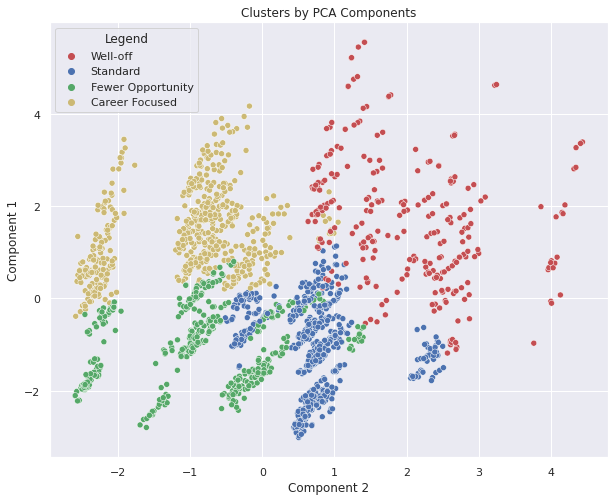

In [43]:
x_axis = data_pca_kmeans['Component 2']
y_axis = data_pca_kmeans['Component 1']
plt.figure(figsize= (10,8))
sns.scatterplot(x_axis, y_axis, hue=data_pca_kmeans['Legend'], palette= ['r', 'b', 'g', 'y'])
plt.title("Clusters by PCA Components")
plt.show()

#Data Export

In [44]:
pickle.dump(scalar, open('scalar.pickle', 'wb'))

In [45]:
pickle.dump(pca, open('pca.pickle','wb'))

In [46]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))